# RRG Relative Strength

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/rrg-relative-strength

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
market = '^GSPC'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
benchmark_df = yf.download(market, start, end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106266,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207153,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777870,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069565,158066000


In [3]:
# Calculate the Relative Strength (RS)
df['RS'] = df['Adj Close'] / benchmark_df['Adj Close']

# Compute the RS-Ratio
def calculate_rs_ratio(rs, period=14):
    return rs / rs.rolling(window=period).mean()

df['RS-Ratio'] = calculate_rs_ratio(df['RS'])

# Calculate the RS-Momentum
def calculate_rs_momentum(rs_ratio, period=14):
    return rs_ratio.diff(period)

df['RS-Momentum'] = calculate_rs_momentum(df['RS-Ratio'])


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RS,RS-Ratio,RS-Momentum
Date,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400,0.018801,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106266,133332000,0.018731,NaN,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207153,137160000,0.018487,NaN,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777870,150479200,0.018379,NaN,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069565,158066000,0.018098,NaN,NaN


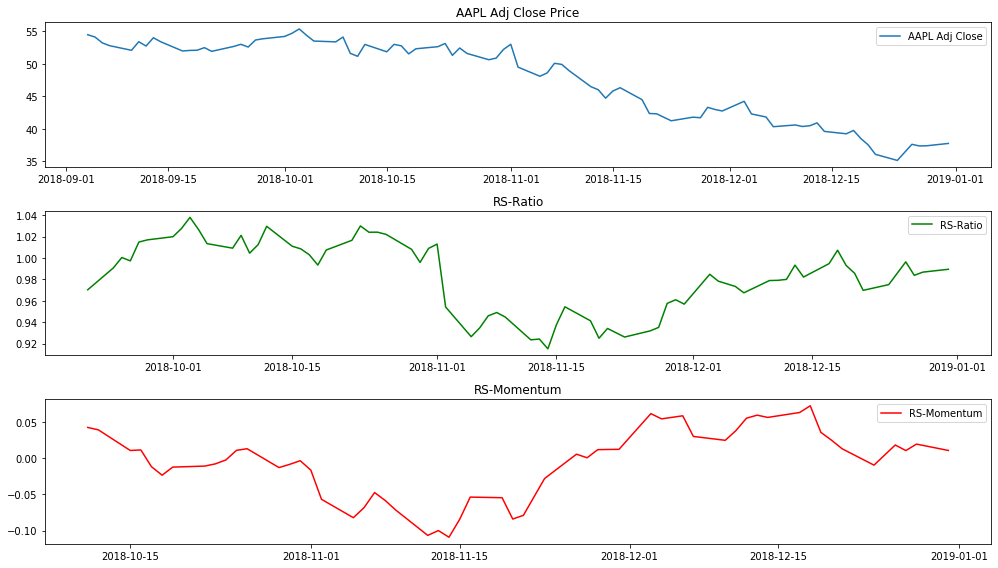

In [5]:
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Adj Close'], label=f'{symbol} Adj Close')
plt.title(f'{symbol} Adj Close Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df.index, df['RS-Ratio'], label='RS-Ratio', color='g')
plt.title('RS-Ratio')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df.index, df['RS-Momentum'], label='RS-Momentum', color='r')
plt.title('RS-Momentum')
plt.legend()

plt.tight_layout()
plt.show()

## Candlestick with RRG Relative Strength

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RS,RS-Ratio,RS-Momentum,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461617,109560400,0.018801,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106266,133332000,0.018731,NaN,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207153,137160000,0.018487,NaN,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777870,150479200,0.018379,NaN,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069565,158066000,0.018098,NaN,NaN,False


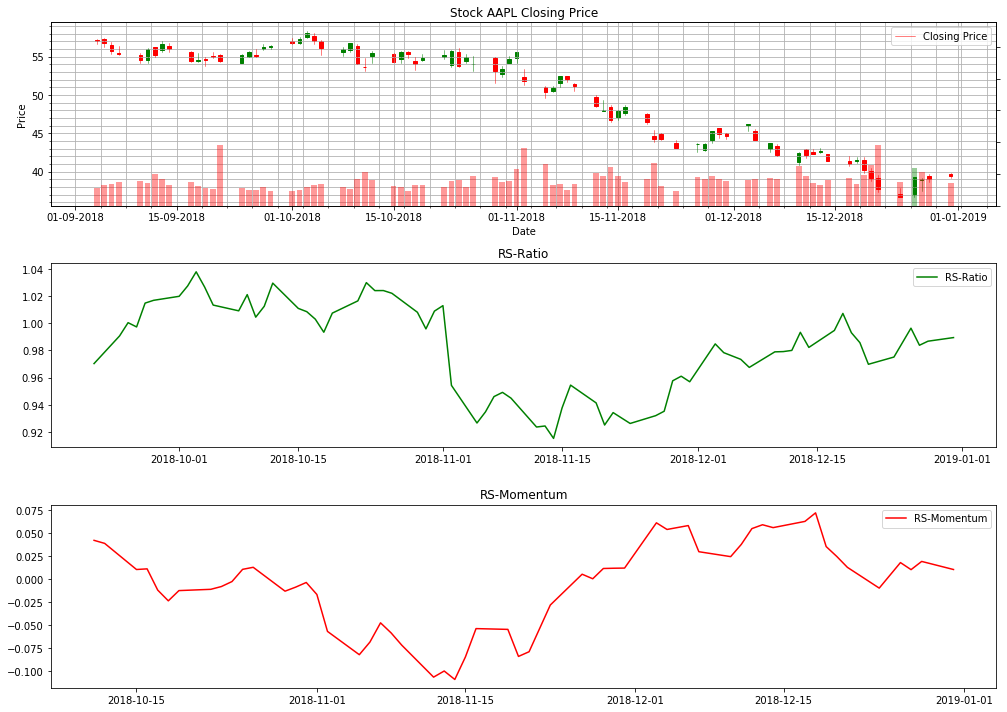

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df.index, df['RS-Ratio'], label='RS-Ratio', color='g')
ax2.set_title('RS-Ratio')
ax2.legend(loc='best')

ax3 = plt.subplot(3, 1, 3)
ax3.plot(df.index, df['RS-Momentum'], label='RS-Momentum', color='r')
ax3.set_title('RS-Momentum')
ax3.legend(loc='best')              
            
              
plt.tight_layout()
plt.show()